In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
# Use Pandas to read the Denver crime data
den_crime_data = pd.read_csv("den_crime_data_2015-2017.csv")
moon_data = pd.read_csv("moon_phases_2015 through 2017.csv")


In [3]:
den_crime_data.head()

,Date,OFFENSE_CATEGORY_ID,IS_CRIME
0,6/15/2016,all-other-crimes,1
1,10/11/2017,larceny,1
2,3/4/2016,theft-from-motor-vehicle,1
3,6/22/2017,larceny,1
4,6/1/2017,theft-from-motor-vehicle,1


In [4]:
# Rename Full Date column
moon_data.rename(columns = {'Full Date':'Date'}, inplace = True)
moon_data.head()

,Date,Year,Day,Month,Percent Illumination,Moon Phase
0,1/1/2015,2015,1,1,84.00%,Waxing gibbous
1,1/2/2015,2015,2,1,91.00%,Waxing gibbous
2,1/3/2015,2015,3,1,96.00%,Waxing gibbous
3,1/4/2015,2015,4,1,99.00%,Waxing gibbous
4,1/5/2015,2015,5,1,100.00%,Full Moon


In [5]:
# Combine the data into a single dataset
den_data_comp = pd.merge(den_crime_data, moon_data, how="left", on = 'Date')
den_data_comp.head()

,Date,OFFENSE_CATEGORY_ID,IS_CRIME,Year,Day,Month,Percent Illumination,Moon Phase
0,6/15/2016,all-other-crimes,1,2016,15,6,76.00%,Waxing gibbous
1,10/11/2017,larceny,1,2017,11,10,65.00%,Waning gibbous
2,3/4/2016,theft-from-motor-vehicle,1,2016,4,3,28.00%,Waning crescent
3,6/22/2017,larceny,1,2017,22,6,6.00%,Waning crescent
4,6/1/2017,theft-from-motor-vehicle,1,2017,1,6,47.00%,First Quarter


In [6]:
# Change date formatting
den_data_comp['Date'] = den_data_comp['Date'].apply(lambda x : dt.datetime.strptime(x, '%m/%d/%Y'))

In [7]:
# Create an overview table that summarizes necessary data: 

#Total crimes by date
den_clean = den_data_comp
den_crime_total = pd.DataFrame(den_clean.Date.value_counts())

# Rename Date column to Total Crimes
den_crime_total_rename = den_crime_total.rename(columns={'Date': 'Total Crimes'})

# Add index title for Total Crime
den_crime_total_rename.index.name = 'Date'

# Merge crime counts with previous total data frame
den_total_crime = den_clean.merge(den_crime_total_rename, how='outer', on='Date').drop(['OFFENSE_CATEGORY_ID', 'IS_CRIME', 'Year', "Day", "Month", "Moon Phase"], axis=1) 
den_total_crime

# Remove duplicate dates/condense
den_totcrime_rm = den_total_crime.drop_duplicates()

# Sort data frame by date
den_sum_bydate = den_totcrime_rm.sort_values(by='Date')

# Reset index values
den_summary = den_sum_bydate.reset_index(drop=True)

# Print the data
den_summary.head()

,Date,Percent Illumination,Total Crimes
0,2015-01-01,84.00%,245
1,2015-01-02,91.00%,149
2,2015-01-03,96.00%,131
3,2015-01-04,99.00%,113
4,2015-01-05,100.00%,167


In [8]:
# Changing the Percent Illumination column data type to a float for binning below
den_summary['Percent Illumination'] = den_summary['Percent Illumination'].str.rstrip('%').astype('float')

In [9]:
# Create percent illumination bins
bins = [0, 3, 10, 21.5, 35.5, 51, 66, 79, 90, 97, 100]
group_name = ['0-3%', '4-10%', '11-21%', 
              '22-35%', '36-50%', '51-65%', 
              '66-78%', '79-89%', '90-96%', '97-100%']
den_summary['% Illumination'] = pd.cut(den_summary['Percent Illumination'], 
                                      bins, 
                                      labels = group_name, 
                                      include_lowest=True)

# Group the merged data by school spending
by_illumination = den_summary.groupby('% Illumination')

# Calculate average crime
avg_crime = by_illumination['Total Crimes'].mean()

# Store illumination bins in a dataframe            
den_summary_new = pd.DataFrame({'Average Crime': avg_crime})

# Print new summary data frame
den_summary_new

,Average Crime
% Illumination,
0-3%,190.625000
4-10%,188.978723
11-21%,185.000000
22-35%,179.834862
36-50%,184.333333
51-65%,184.018692
66-78%,183.867925
79-89%,185.513514
90-96%,185.212963


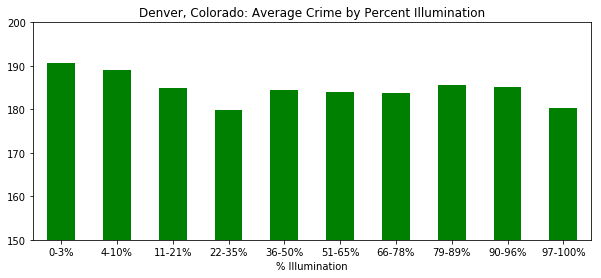

In [10]:
# Use DataFrame.plot() in order to create a bar chart of the data
den_summary_new.plot(kind="bar", title='Denver, Colorado: Average Crime by Percent Illumination', figsize=(10,4), legend=False, color="green", ylim=(150,200), rot=0)

# Save plot
plt.savefig("den_avgcrime_percillum.png")

# Show plot
plt.show()

In [11]:
# Save summary data to csv
den_summary_new.head()

,Average Crime
% Illumination,
0-3%,190.625000
4-10%,188.978723
11-21%,185.000000
22-35%,179.834862
36-50%,184.333333


In [ ]:
den_daily_avg_crime = den_crime_total_rename['Total Crimes'].mean()
den_daily_avg_crime

In [37]:
full_moon_avg = den_summary_new.filter(like='97-100%', axis=0)

In [38]:
full_moon_avg = den_summary_new.filter(like='97-100%', axis=0).mean()
full_moon_avg

Average Crime    180.330275
dtype: float64

In [43]:
stats.ttest_ind(full_moon_avg, den_daily_avg_crime, axis=0)

C:\Users\elampa\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\elampa\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\elampa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\elampa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\elampa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Ttest_indResult(statistic=nan, pvalue=nan)